# Exercise 5: Variance reduction methods

### 1
stimate the integral � 1
0 exdx by simulation (the crude Monte Carlo
estimator). Use eg. an estimator based on 100 samples and present
the result as the point estimator and a confidence interval.

In [35]:
from scipy.stats import expon
import numpy as np
from discrete_event import Customer, main_loop, confidence_intervals, erlang_b

In [36]:

n = 100
#function to generate random number
U = np.random.uniform(0,1,n)
X = np.exp(U)
theta = np.mean(X)
print("Estimated integral", theta, "True integral", np.exp(1)-1)

#confidence interval for the mean
s = np.std(X)
#get t statistic for 95% confidence interval and n-1 degrees of freedom
t = 1.984
confint = [theta - 1.984*s/np.sqrt(n), theta + 1.984*s/np.sqrt(n)]
print(" Confidence interval for the mean", confint)

Estimated integral 1.7276565504107708 True integral 1.718281828459045
 Confidence interval for the mean [1.6347455995686173, 1.8205675012529243]


### 2
Estimate the integral � 1
0 exdx using antithetic variables, with
comparable computer ressources.

In [37]:
#Antithetic variables
U = np.random.uniform(0,1,n)
Y = (np.exp(U) + np.exp(1-U))/2
theta = np.mean(Y)
#confidence interval for the mean
s = np.std(Y)
#get t statistic for 95% confidence interval and n-1 degrees of freedom
t = 1.984
confint = [theta - 1.984*s/np.sqrt(n), theta + 1.984*s/np.sqrt(n)]
print("Antithetic variables: Estimated integral", theta, "True integral", np.exp(1)-1)
print("Antithetic variables: Confidence interval for the mean", confint)

Antithetic variables: Estimated integral 1.7172177506809079 True integral 1.718281828459045
Antithetic variables: Confidence interval for the mean [1.7055568317434524, 1.7288786696183633]


### 3
Estimate the integral � 1
0 exdx using a control variable, with
comparable computer ressources.

In [38]:
U = np.random.uniform(0,1,n)
X = np.exp(U)
c = -0.14086/(1/12)#- np.cov(X,Y)[0,1]/np.var(Y)
Z = X + c*(U-1/2)
theta = np.mean(Z)
print("Control variates: Estimated integral", theta, "True integral", np.exp(1)-1)
print("Control variates: Confidence interval for the mean", confidence_intervals(Z))

Control variates: Estimated integral 1.7292819229523722 True integral 1.718281828459045
Control variates: Confidence interval for the mean (1.7173658032529928, 1.7411980426517515)


### 4
 Estimate the integral � 1
0 exdx using stratified sampling, with
comparable computer ressources.

In [39]:
#
U = np.random.uniform(0,1,(10,10))
W = np.sum([np.exp((U[i]+ i)/10) for i in range(10)], axis=0)/10
theta = np.mean(W)
print("Stratified sampling: Estimated integral", theta, "True integral", np.exp(1)-1)
print("Stratified sampling: Confidence interval for the mean", confidence_intervals(W))


### KOM TILBAGE TIL DET HER WTF

Stratified sampling: Estimated integral 1.718559283413585 True integral 1.718281828459045
Stratified sampling: Confidence interval for the mean (1.7087687303693377, 1.7283498364578322)


### 5
Use control variates to reduce the variance of the estimator in
exercise 4 (Poisson arrivals).

Before control variables

In [40]:
#arrival time differences are exponentially distributed
lam = 1
total_customers = 10000
m = 10
s = 8
repititions = 10
#arrival time differences are exponentially distributed
arrival_interval = lambda : np.random.exponential(1/lam, size = total_customers)
service_time =lambda : expon.rvs(scale = s, size = total_customers)

blocked = main_loop(arrival_interval, service_time, m, repititions = repititions)/total_customers
print("Blocking probability", blocked/total_customers)
#confidence interval for the mean
theta = np.mean(blocked)
confint = confidence_intervals(blocked)
print("Estimated blocking probability", theta, "True blocking probability", erlang_b(m, lam*s))
print("Confidence interval for the mean", confint)
print("Interval width", confint[1]-confint[0])

Blocking probability [1.260e-05 1.212e-05 1.242e-05 1.266e-05 1.225e-05 1.223e-05 1.196e-05
 1.113e-05 1.169e-05 1.188e-05]
Estimated blocking probability 0.12094 True blocking probability 0.12166106425295149
Confidence interval for the mean (0.1182508400002975, 0.12362915999970252)
Interval width 0.0053783199994050235


In [41]:
#Empirical covariance between exponential and uniform random variables
n = 10000
U = np.random.uniform(0,1,n)
X = np.random.exponential(1/s,n)
#c for minimizing variance of X + c(U-1/2)
c = -np.cov(X,U)[0,1]/np.var(U)
c

0.0010834813024114612

In [42]:
#arrival time differences are exponentially distributed
arrival_interval = lambda : np.random.exponential(1/lam, size = total_customers) + c*(np.random.uniform(0,1, size = total_customers)-1/2)
service_time =lambda : expon.rvs(scale = s, size = total_customers)

In [43]:
np.random.seed(0)
blocked = main_loop(arrival_interval, service_time, m, repititions = repititions)/total_customers
print("Blocking probability", blocked/total_customers)
#confidence interval for the mean
theta = np.mean(blocked)
confint = confidence_intervals(blocked)
print("Estimated blocking probability", theta, "True blocking probability", erlang_b(m, lam*s))
print("Confidence interval for the mean", confint)
print("Interval width", confint[1]-confint[0])

Blocking probability [1.249e-05 1.210e-05 1.279e-05 1.216e-05 1.169e-05 1.326e-05 1.188e-05
 1.209e-05 1.256e-05 1.189e-05]
Estimated blocking probability 0.12290999999999999 True blocking probability 0.12166106425295149
Confidence interval for the mean (0.12007992695783305, 0.12574007304216692)
Interval width 0.005660146084333864


### 6
Demonstrate the effect of using common random numbers in
exercise 4 for the difference between Poisson arrivals (Part 1) and a
renewal process with hyperexponential interarrival times. Remark:
You might need to do some thinking and some re-programming.

In [47]:
#compute c for minimizing variance of X + c(U-1/2)
# hyper exponential inter arrival times. The parameters for
#the hyper exponential distribution should be
p1 = 0.8
λ1 = 0.8333
p2 = 0.2
λ2 = 5.0
U = np.random.uniform(0,1,n)
X = np.random.choice([expon.rvs(scale = 1/λ1), expon.rvs(scale = 1/λ2)], n, p=[p1, p2])
c = -np.cov(X,U)[0,1]/np.var(U)
c

-0.008252904636120526

In [45]:
arrival_interval = lambda : np.random.choice([expon.rvs(scale = 1/λ1), expon.rvs(scale = 1/λ2)], total_customers, p=[p1, p2]) + c*(np.random.uniform(0,1, size = total_customers)-1/2)
service_time = lambda : expon.rvs(scale = s, size = total_customers)

In [49]:
np.random.seed(0)
blocked_hyperexp = main_loop(arrival_interval,service_time, m)
print("Blocking probability: ", blocked_hyperexp/total_customers)

Blocking probability:  [0.1573 0.6779 0.0796 0.8492 0.5475 0.3808 0.0172 0.7817 0.     0.2191]


### 7
For a standard normal random variable Z ∼ N(0, 1) using the crude
Monte Carlo estimator estimate the probability Z > a. Then try
importance sampling with a normal density with mean a and
variance σ2. For the expirements start using σ2 = 1, use different
values of a (e.g. 2 and 4), and different sample sizes. If time
permits experiment with other values for σ2. Finally discuss the
efficiency of the methods

In [103]:
# Z is standard normal
n = 10000
Z = np.random.normal(0,1,n)
a = 2
#Compute the probability that Z > a
p_a = np.mean(Z > a)
print("Monte Carlo probability that Z > a", p_a)


Monte Carlo probability that Z > a 0.0233


In [104]:
#part 2 Sample from Normal(a, sigma^2)
sigma = 1

#Y is Normal(a, sigma^2)
Y = np.random.normal(a, sigma, n)
#g is the probability density of Y
g = np.exp(-(Y-a)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
#f is standard normal density evaluated at Y
f = np.exp(-Y**2/2)/np.sqrt(2*np.pi)
h = Y > a

theta = np.mean(h*(f/g))
print("Importance sampling probability that Z > a", theta)

Importance sampling probability that Z > a 0.022176200932133038


### 8
Use importance sampling with g(x) = λ exp (−λ ∗ x) to calculate
the integral � 1
0 exdx of Question 1. Try to find the optimal value of
λ by calculating the variance of h(X)f(X)/g(X) and verify by
simulation. Note that importance sampling with the exponential
distribution will not reduce the variance

In [200]:
lambdas = np.arange(0.002, 3, 0.001)
X = np.random.exponential(1/lambdas, (n, len(lambdas)))
#g is the probability density of X
g = lambdas*np.exp(-lambdas*X)
h = np.exp(X)
f = X <= 1 
vars = np.var(h*f/g, axis = 0)

C:\Users\MGAJ\AppData\Local\Temp\ipykernel_26684\2529840966.py:5: RuntimeWarning: overflow encountered in exp
  h = np.exp(X)
C:\Users\MGAJ\AppData\Local\Temp\ipykernel_26684\2529840966.py:7: RuntimeWarning: invalid value encountered in multiply
  vars = np.var(h*f/g, axis = 0)


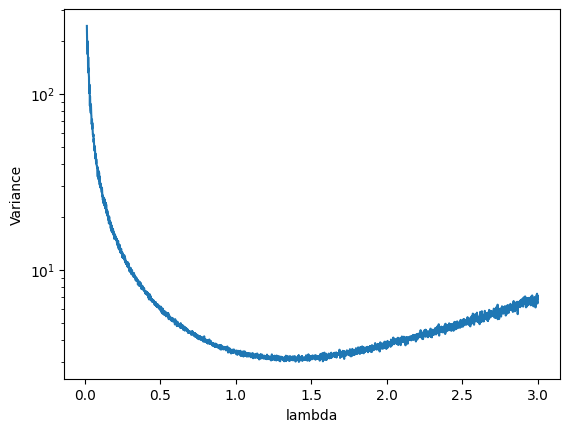

In [201]:
#plot vars log scale of lambas
import matplotlib.pyplot as plt
plt.plot(lambdas, vars)
plt.yscale("log")
plt.xlabel("lambda")
plt.ylabel("Variance")
plt.show()

In [205]:
#optimal lambda (exclude nans)
optimal_lambda = lambdas[np.nanargmin(vars)]
print("Optimal lambda", optimal_lambda)

Optimal lambda 1.417


In [207]:
#f is the density of U
# Y is Exp(lam)
lam = 10000
Y = np.random.exponential(1/optimal_lambda, n)
#g is the density of Y
g = optimal_lambda*np.exp(-optimal_lambda*Y)
h = np.exp(Y)
f = Y <= 1
theta = np.mean(h*(f/g))
print("Importance sampling E(exp(U))", theta, "True value", np.exp(1)-1)

Importance sampling E(exp(U)) 1.7135425615311268 True value 1.718281828459045


### 8
For the Pareto case derive the IS estimator for the mean using the
first moment distribution as sampling distribution. Is the approach
meaningful? and could this be done in general? With this insight
could you change the choice of g(x) in the previous questio

In [ ]:
#pareto
alpha = 2
n = 10000
X = np.random.pareto(alpha, n)
#g is the density of X
g = alpha*X**(alpha+1)